In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
#Veri setini yükle
data = pd.read_csv("C:/Users/Elif/Desktop/diamonds.csv")

In [101]:
print(data.isnull().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [102]:
#Kategorik ve sayısal sütunları bul
obj_col = data.select_dtypes(include='object').columns
num_col = data.select_dtypes(exclude='object').columns

In [103]:
#Kategorik sütunları etiket kodla
le = LabelEncoder()
for col in obj_col:
    data[col] = le.fit_transform(data[col])

In [104]:
#Sayısal sütunları normalize et
norm = Normalizer()
data[num_col] = norm.fit_transform(data[num_col])

In [105]:
#Veriyi eğitim ve test setlerine ayır
X_data = data.drop(['cut'], axis=1)
y_data = data['cut']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=42)

In [106]:
#Lojistik regresyon modelini oluştur ve eğit
log_reg = LogisticRegression(max_iter=1000)
fit_model = log_reg.fit(X_train, y_train)

In [107]:
#Tahminler yap
preds = fit_model.predict(X_test)
probs = fit_model.predict_proba(X_test)

In [108]:
#Sonuçları bir veri çerçevesine dönüştür
model_results = pd.DataFrame({
    'PredictedClass': preds,
    'TrueClass': y_test,
    'ClassProb:0': probs[:, 0],
    'ClassProb:1': probs[:, 1]
})

In [109]:
#Doğru sınıflandırma sayısını hesapla
true_count = sum(preds == y_test)
print("Number of True Classifications =", true_count)
print("Accurate Classification Ratio =", true_count / len(y_test))

Number of True Classifications = 7119
Accurate Classification Ratio = 0.3999213527329925


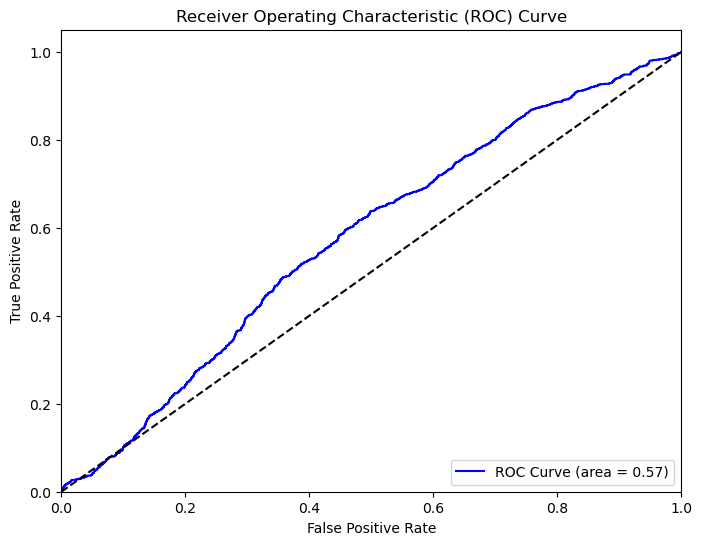

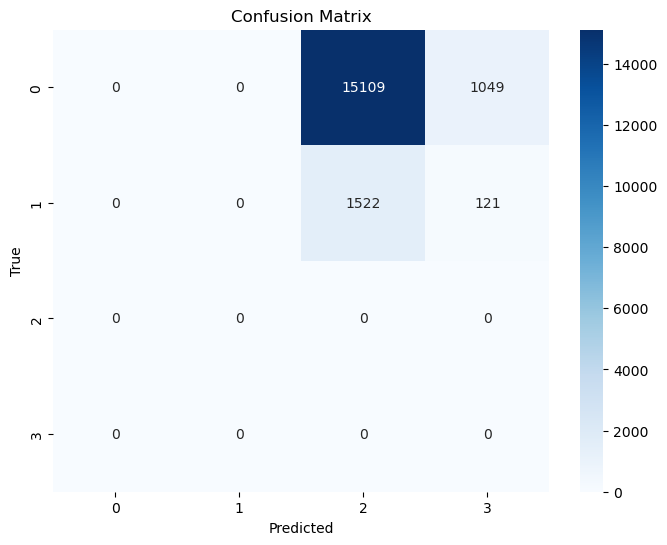

In [110]:
#İkili sınıf etiketlerine dönüştürme
class_of_interest = 1
y_binary = (y_test == class_of_interest).astype(int)

#ROC Eğrisi ve AUC Skoru
fpr, tpr, thresholds = roc_curve(y_binary, probs[:, 1])
roc_auc = roc_auc_score(y_binary, probs[:, 1])

#ROC eğrisini çizdirme ve AUC skorunu yazdırma
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc, color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#Karmaşıklık Matrisi
cm = confusion_matrix(y_binary, preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [111]:
#Yeni müşteri senaryosu
new_customer = pd.DataFrame({
    'carat': [0.000684],    
    'color': [1],
    'clarity': [3], 
    'depth': [0.182854], 
    'table': [0.163528],
    'price': [0.969274],
    'x': [0.011744],
    'y': [0.011833],
    'z': [0.007225]
})

#Tahmin yap
predicted_class = fit_model.predict(new_customer)
print("Tahmin edilen sınıf:", predicted_class)

Tahmin edilen sınıf: [2]
